# IMPORTING LIBRARIES


In [1]:
import pandas as pd #for storing data into dataframes
import numpy as np #numerical python for mathematical calculations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# IMPORTING DATASETS


In [3]:
tweets_df1=pd.read_csv("twitter.csv")
test_df=pd.read_csv("youtube.csv")

In [4]:
tweets_df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
tweets_df=tweets_df1.append(test_df,ignore_index = True,sort = True)

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
tweets_df.describe()

,id,label
count,49159.000000,31962.000000
mean,24580.000000,0.070146
std,14191.125278,0.255397
min,1.000000,0.000000
25%,12290.500000,0.000000
50%,24580.000000,0.000000
75%,36869.500000,0.000000
max,49159.000000,1.000000


In [8]:
tweets_df["tweet"]

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feeling like a mermaid ð #hairflip #neverre...
49156    #hillary #campaigned today in #ohio((omg)) &am...
49157    happy, at work conference: right mindset leads...
49158    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 49159, dtype: object

In [9]:
tweets_df=tweets_df.drop(["id"],axis=1)
tweets_df

,label,tweet
0,0.0,@user when a father is dysfunctional and is s...
1,0.0,@user @user thanks for #lyft credit i can't us...
2,0.0,bihday your majesty
3,0.0,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation
...,...,...
49154,NaN,thought factory: left-right polarisation! #tru...
49155,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,NaN,"happy, at work conference: right mindset leads..."


In [10]:
tweets_df.isnull().sum()

label    17197
tweet        0
dtype: int64

# EXPLORE DATASET

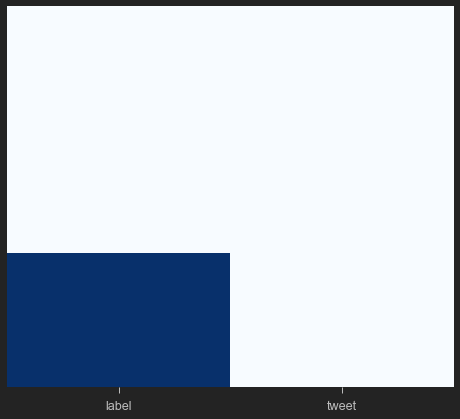

In [11]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237190E4408>]],
      dtype=object)

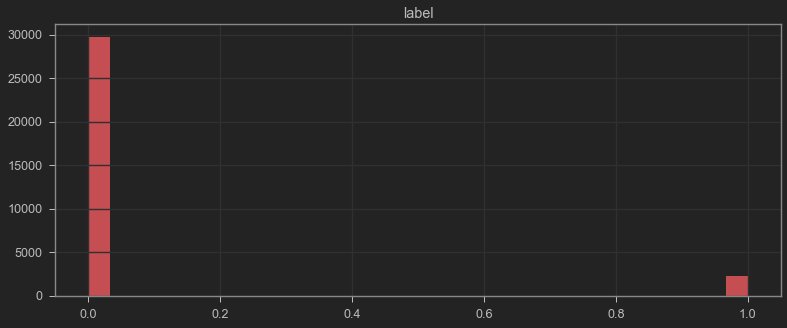

In [12]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

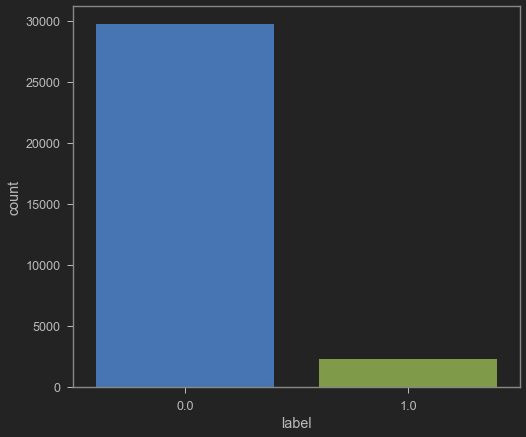

In [13]:
sns.countplot(tweets_df['label'],label="count")

In [14]:
tweets_df["length"]=tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,length
0,0.0,@user when a father is dysfunctional and is s...,102
1,0.0,@user @user thanks for #lyft credit i can't us...,122
2,0.0,bihday your majesty,21
3,0.0,#model i love u take with u all the time in ...,86
4,0.0,factsguide: society now #motivation,39
...,...,...,...
49154,NaN,thought factory: left-right polarisation! #tru...,108
49155,NaN,feeling like a mermaid ð #hairflip #neverre...,96
49156,NaN,#hillary #campaigned today in #ohio((omg)) &am...,145
49157,NaN,"happy, at work conference: right mindset leads...",104


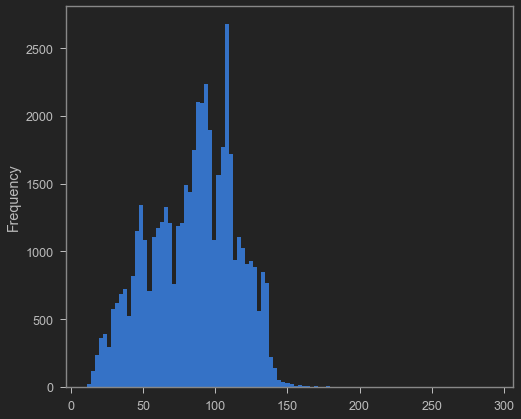

In [15]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [16]:
tweets_df.describe()

,label,length
count,31962.000000,49159.000000
mean,0.070146,84.672023
std,0.255397,29.508458
min,0.000000,11.000000
25%,0.000000,62.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,292.000000


In [17]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [18]:
positive = tweets_df[tweets_df['label']==0]
positive.head()

,label,tweet,length
0,0.0,@user when a father is dysfunctional and is s...,102
1,0.0,@user @user thanks for #lyft credit i can't us...,122
2,0.0,bihday your majesty,21
3,0.0,#model i love u take with u all the time in ...,86
4,0.0,factsguide: society now #motivation,39


In [20]:
negative = tweets_df[tweets_df['label']==1]
negative.head()

,label,tweet,length
13,1.0,@user #cnn calls #michigan middle school 'buil...,74
14,1.0,no comment! in #australia #opkillingbay #se...,101
17,1.0,retweet if you agree!,22
23,1.0,@user @user lumpy says i am a . prove it lumpy.,47
34,1.0,it's unbelievable that in the 21st century we'...,104


# PLOTTING WORDCLOUD 

In [21]:
sentences=tweets_df['tweet'].tolist()

In [22]:
len(sentences)

49159

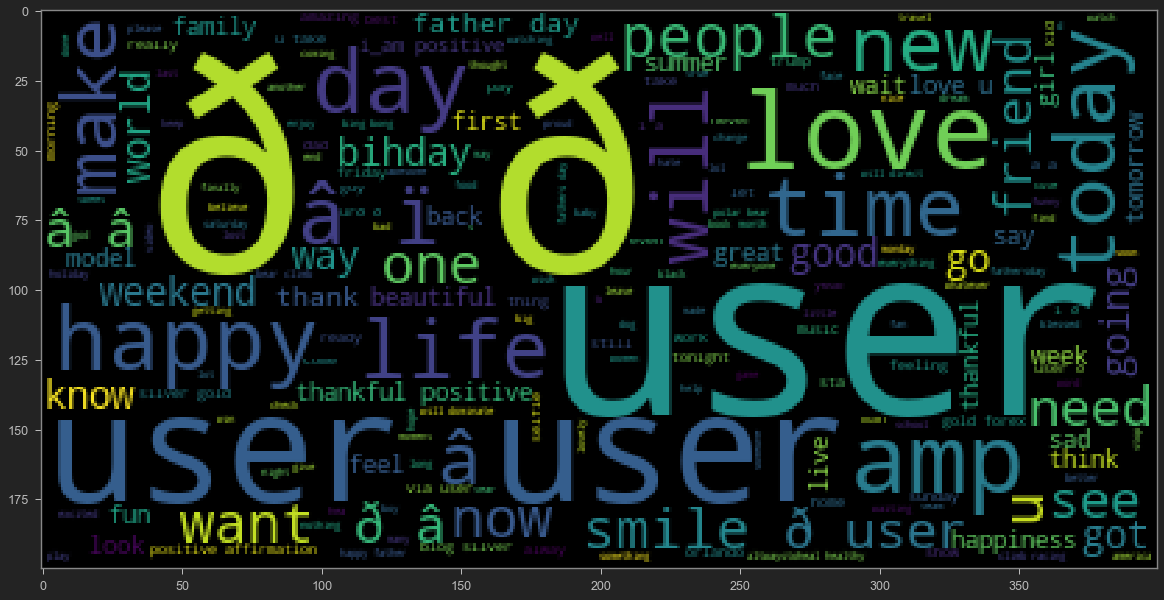

In [23]:
sentences_as_one_string = " ".join(sentences)
#!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [24]:
negative_list=negative["tweet"].tolist()
negative_list

["@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  ",
 'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins',
 'retweet if you agree! ',
 '@user @user lumpy says i am a . prove it lumpy.',
 "it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia ",
 '@user lets fight against  #love #peace ',
 "ð\x9f\x98©the white establishment can't have blk folx running around loving themselves and promoting our greatness  ",
 "@user hey, white people: you can call people 'white' by @user  #race  #identity #medâ\x80¦",
 'how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    ',
 "@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦",
 '@user why not @user mocked obama for being black.  @user @user @user @user #brexit',
 "#people aren't protesting #trump because a #republican won-

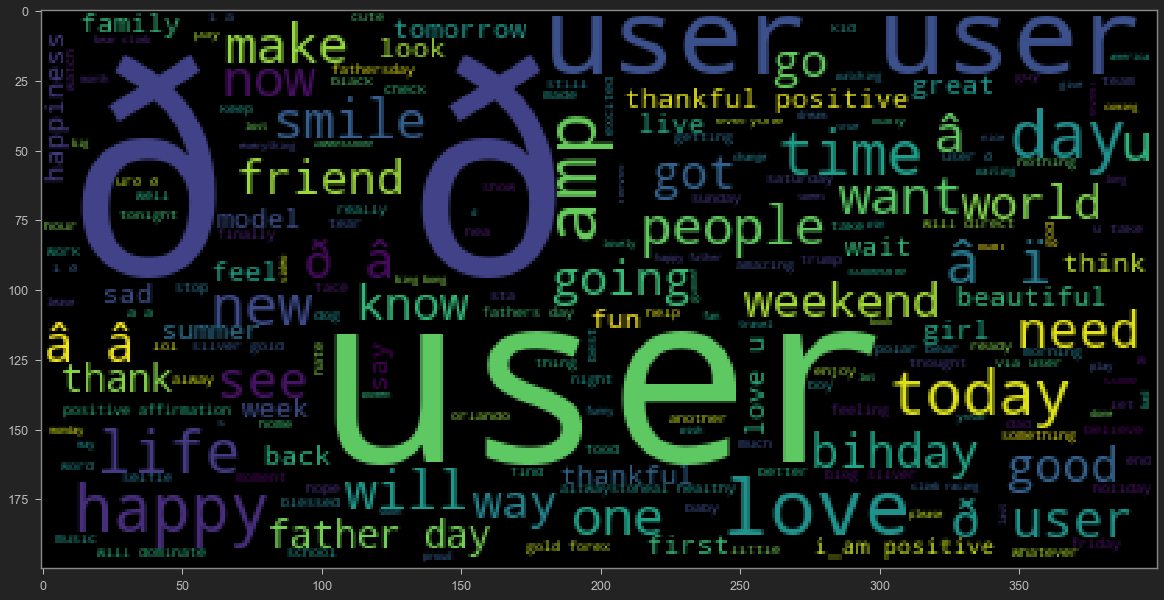

In [27]:
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

#  PERFORM DATA PROCESSING:REMOVE PUNCTUATIONS, STOPWORDS,STEMMING AND PERFORM COUNT VECTORIZATION

In [28]:
import string
string.punctuation
import nltk # Natural Language tool kit 

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [30]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)


In [31]:
print(tweets_df_clean[1]) # show the cleaned up version


['user', 'user', 'thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']


In [32]:
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
tweets_df_clean= tweets_df_clean.apply(lambda x : [stemmer.stem(i) for i in x])
tweets_df_clean.head()

0    [user, father, dysfunct, selfish, drag, kid, d...
1    [user, user, thank, lyft, credit, cant, use, c...
2                                    [bihday, majesti]
3    [model, love, u, take, u, time, urð±, ðð...
4                          [factsguid, societi, motiv]
Name: tweet, dtype: object

In [33]:
for i in range(len(tweets_df_clean)):
    tweets_df_clean[i] = ' '.join(tweets_df_clean[i])
tweets_df["org_tweets"]=tweets_df["tweet"]
tweets_df["tweet"]=tweets_df_clean
tweets_df.head()

,label,tweet,length,org_tweets
0,0.0,user father dysfunct selfish drag kid dysfunct...,102,@user when a father is dysfunctional and is s...
1,0.0,user user thank lyft credit cant use caus dont...,122,@user @user thanks for #lyft credit i can't us...
2,0.0,bihday majesti,21,bihday your majesty
3,0.0,model love u take u time urð± ðððð...,86,#model i love u take with u all the time in ...
4,0.0,factsguid societi motiv,39,factsguide: society now #motivation


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])
print(vectorizer.get_feature_names())

['0', '000', '0000001', '00026', '00027', '00031', '001', '001k', '0035', '007', '00971522817928', '00h30', '00hira00', '01', '0115', '0161', '017', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '0406', '043', '045', '04k', '04â', '05', '0500', '0506823156', '0517aloha', '06', '0602', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '06112016', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscoupl', '0618â\x99¡', '0620', '06202016', '0622', '0624', '0634', '0640', '06â', '07', '07000', '07040', '07044', '07050', '070616', '071', '07150', '07190', '074', '07400', '07468', '07480', '075', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07920', '07930', '07950', '07970', '08', '0806', '080616', '0830', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '09800', '099', '0k', '0share', '0tolerancemovi', '0â°', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', 

In [35]:
tweets_countvectorizer.shape


(49159, 55320)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
tweets_countvectorizer=vectorizer.fit_transform(tweets_df["tweet"])

# GETTING TOP 10 HASHTAGS

In [37]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [38]:
HT_negative =hashtag_extract(tweets_df['org_tweets'][tweets_df['label'] == 1])
HT_positive= hashtag_extract(tweets_df['org_tweets'][tweets_df['label'] == 0])

In [39]:
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

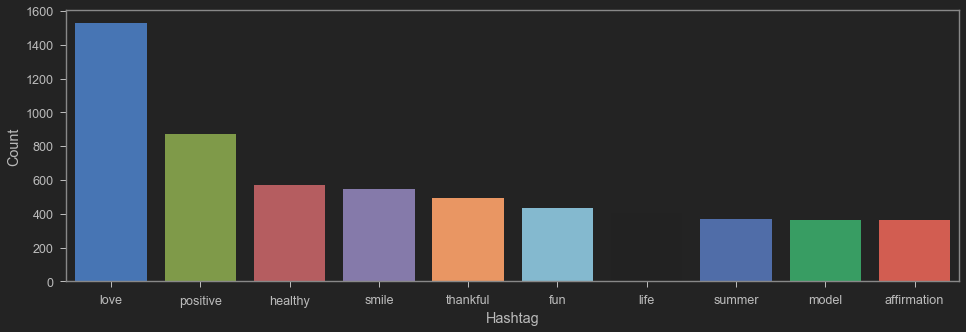

In [40]:
import seaborn as sns
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(10,['Count']) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

ax.set(ylabel = 'Count')
plt.show()

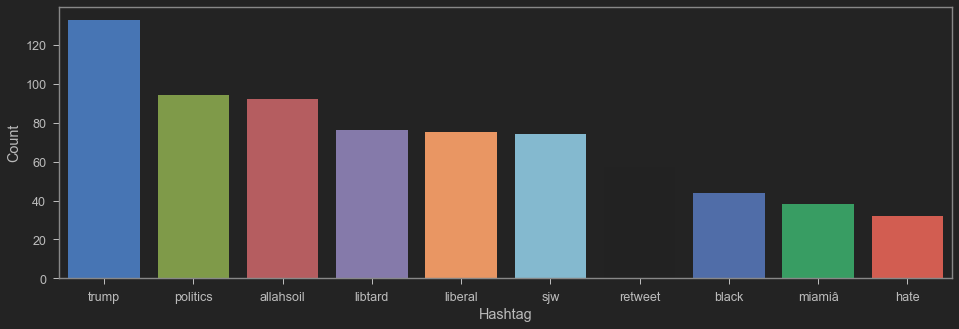

In [41]:
import seaborn as sns
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(10,['Count']) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

ax.set(ylabel = 'Count')
plt.show()

# SPLITTING TRAIN AND TEST DATA

In [42]:
X=tweets_countvectorizer[:31962,:]

In [43]:
X

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 142416 stored elements in Compressed Sparse Row format>

In [44]:
y = tweets_df['label'][:31962]

In [45]:
X.shape

(31962, 1000)

In [46]:
y.shape

(31962,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.3)

# TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [48]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
Model1=NB_classifier.score(X_test,y_test)
Model1

0.9325268536865158

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

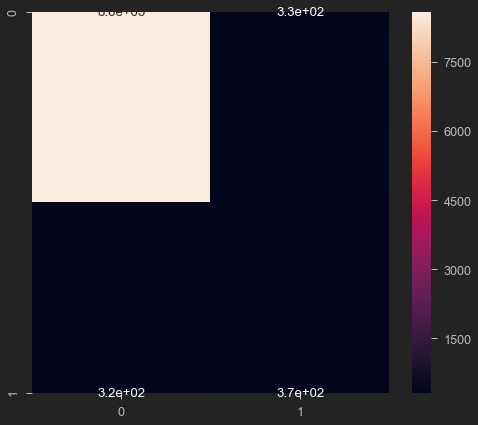

In [51]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      8905
         1.0       0.53      0.54      0.53       684

    accuracy                           0.93      9589
   macro avg       0.75      0.75      0.75      9589
weighted avg       0.93      0.93      0.93      9589



In [53]:
test=tweets_countvectorizer[31962:,:]
test_pred = NB_classifier.predict_proba(test)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_df['label'] = test_pred_int
submission = test_df[['id','label']]
submission.to_csv('flickr.csv', index=False) # writing data to a CSV file

# TRAIN A RANDOM FOREST CLASSIFIER MODEL

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random=RandomForestClassifier()

In [61]:
random.fit(X_train,y_train)

C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred = random.predict(X_test)

In [63]:
Model2=random.score(X_test,y_test)
Model2

0.9283554072374596

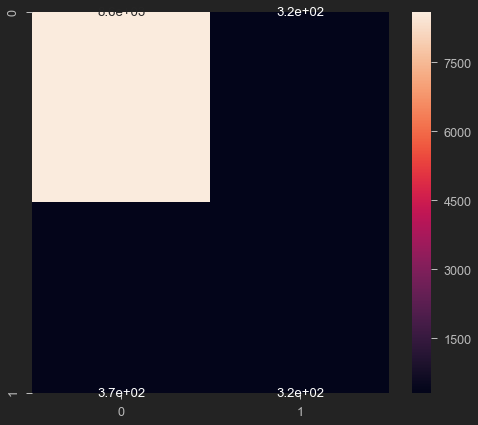

In [64]:
y_predict_test_RF = random.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test_RF)
sns.heatmap(cm, annot=True)

In [65]:
print(classification_report(y_test, y_predict_test_RF))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      8905
         1.0       0.50      0.46      0.48       684

    accuracy                           0.93      9589
   macro avg       0.73      0.71      0.72      9589
weighted avg       0.93      0.93      0.93      9589



# TRAIN A SUPPORT VECTOR MACHINE MODEL

In [66]:
from sklearn import svm
s=svm.SVC()
s.fit(X_train,y_train)

C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred =s.predict(X_test)

In [68]:
Model3=s.score(X_test,y_test)
Model3

0.9286682657211388

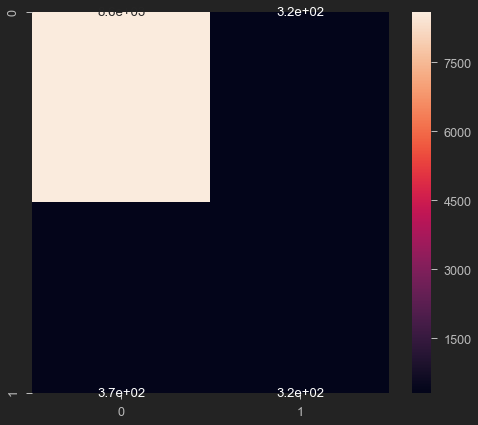

In [69]:
y_predict_test_SVM = random.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test_SVM)
sns.heatmap(cm, annot=True)

In [70]:
print(classification_report(y_test, y_predict_test_SVM))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      8905
         1.0       0.50      0.46      0.48       684

    accuracy                           0.93      9589
   macro avg       0.73      0.71      0.72      9589
weighted avg       0.93      0.93      0.93      9589



# TRAIN A LOGISTIC REGRESSION MODEL


In [71]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train, y_train) 


C:\Users\abhinav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred =lreg.predict(X_test)

In [73]:
Model4=s.score(X_test,y_test)
Model4

0.9286682657211388

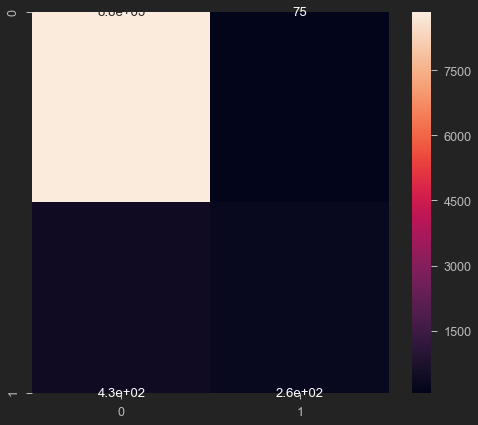

In [74]:
y_predict_test_LR = lreg.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test_LR)
sns.heatmap(cm, annot=True)

In [75]:
print(classification_report(y_test, y_predict_test_LR))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8905
         1.0       0.77      0.37      0.50       684

    accuracy                           0.95      9589
   macro avg       0.86      0.68      0.74      9589
weighted avg       0.94      0.95      0.94      9589



# ANALYZING THE ALGORITHM PERFORMANCE

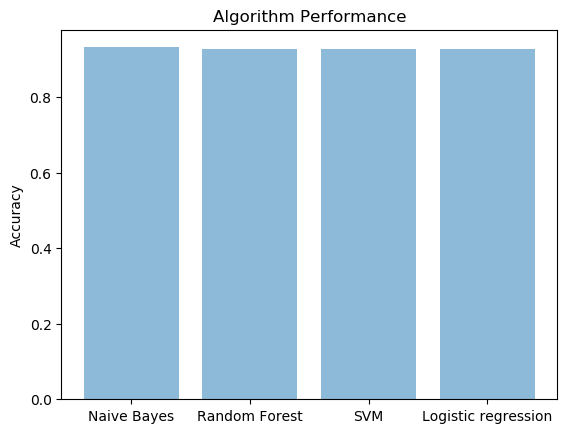

In [76]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Naive Bayes','Random Forest','SVM','Logistic regression')
y_pos = np.arange(len(objects))
performance = [Model1,Model2,Model3,Model4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Performance')

plt.show()

# PREDICTING THE OTHER DATASET BASED ON SVM MODEL AND LOGISTIC REGRESSION AND SAVING IT IN A CSV FILE


In [77]:
test=tweets_countvectorizer[31962:,:]
test_pred = s.predict(test)
#test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_df['label'] = test_pred_int
submission = test_df[['id','label','tweet']]
submission.to_csv('flickr_svm.csv', index=False) # writing data to a CSV file

In [78]:
test=tweets_countvectorizer[31962:,:]
test_pred = lreg.predict(test)
#test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_df['label'] = test_pred_int
submission = test_df[['id','label','tweet']]
submission.to_csv('flickr_svm_LR.csv', index=False) # writing data to a CSV file

In [81]:
output=pd.read_csv("flickr_svm.csv")
output

,id,label,tweet
0,31963,0,#studiolife #aislife #requires #passion #dedic...
1,31964,0,@user #white #supremacists want everyone to s...
2,31965,0,safe ways to heal your #acne!! #altwaystohe...
3,31966,0,is the hp and the cursed child book up for res...
4,31967,0,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...,...
17192,49155,1,thought factory: left-right polarisation! #tru...
17193,49156,0,feeling like a mermaid ð #hairflip #neverre...
17194,49157,1,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,0,"happy, at work conference: right mindset leads..."
